In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('default')
sns.set(font_scale=1.2)

In [55]:
df = pd.read_csv('heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [58]:
target = ['HeartDisease']
numeric =['Age','RestingBP','Cholesterol','FastingBS', 'MaxHR','Oldpeak']
categorical = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina', 'ST_Slope']


In [59]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [60]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [61]:
# look at some basic value range
df[numeric].agg(['min','max','mean','median','std']).T

,min,max,mean,median,std
Age,28.0,77.0,53.510893,54.0,9.432617
RestingBP,0.0,200.0,132.396514,130.0,18.514154
Cholesterol,0.0,603.0,198.799564,223.0,109.384145
FastingBS,0.0,1.0,0.233115,0.0,0.423046
MaxHR,60.0,202.0,136.809368,138.0,25.460334
Oldpeak,-2.6,6.2,0.887364,0.6,1.066570


In [62]:
for c in categorical:
    print(c,df[c].unique())


Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


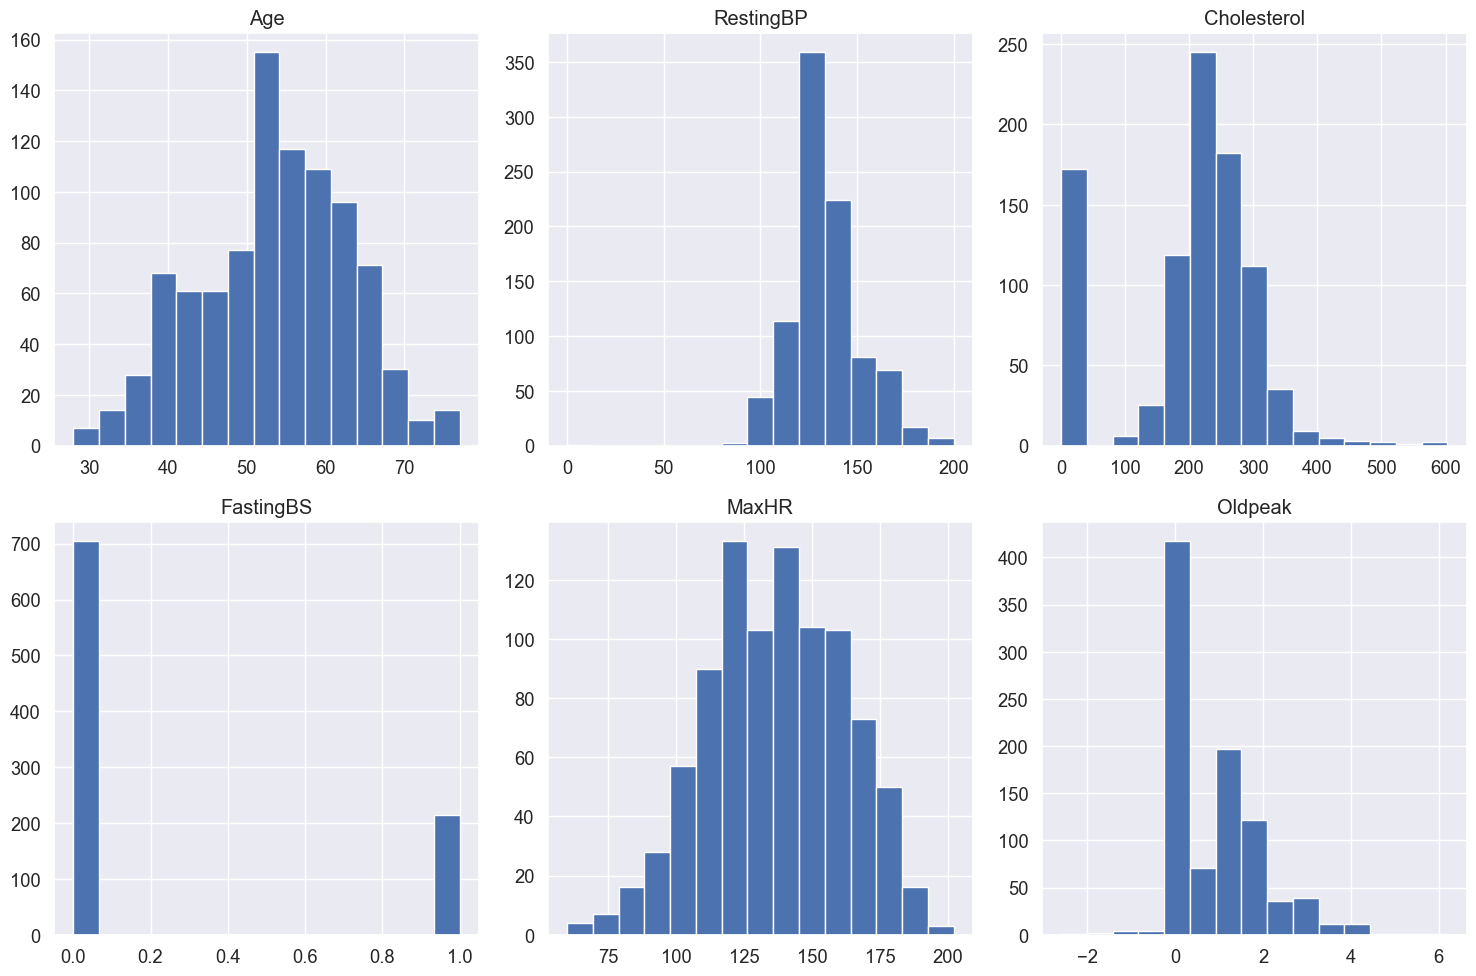

In [63]:

# histograms for numeric features
df[numeric].hist(bins=15, figsize=(15,10), layout=(2,3))
plt.tight_layout() 
plt.show()

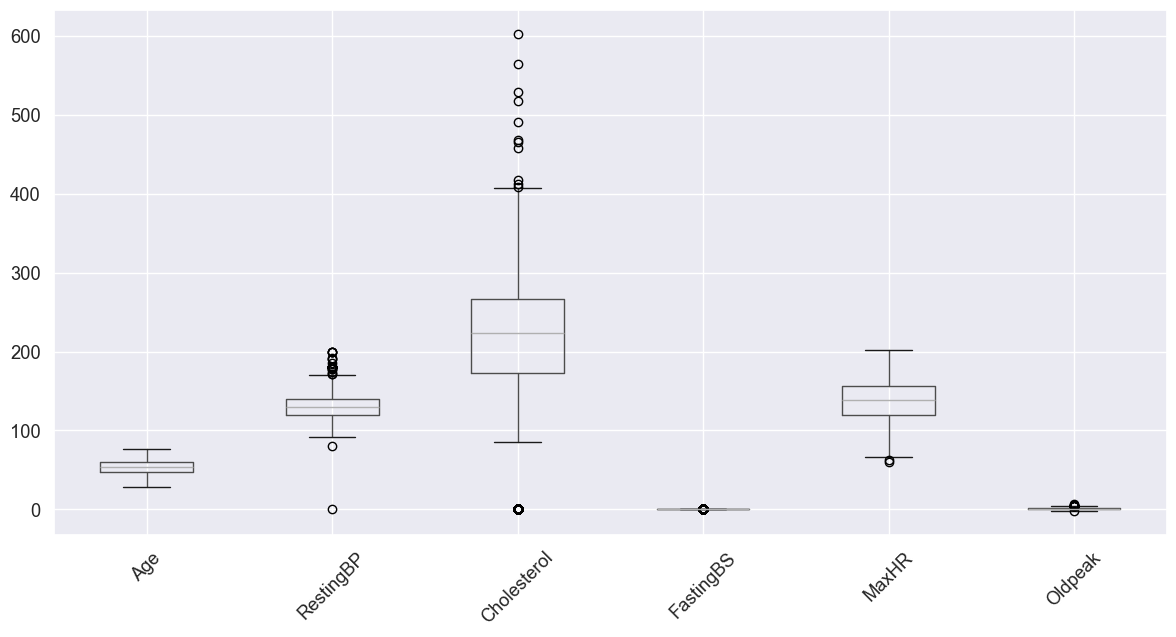

In [64]:
# box plots for numeric features
plt.figure(figsize=(12,6))
df[numeric].boxplot()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

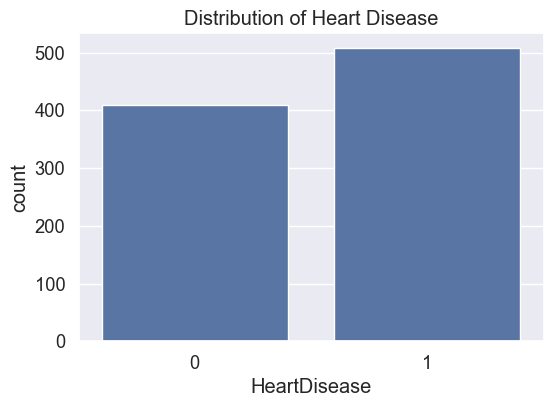

In [65]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['HeartDisease'])
plt.title('Distribution of Heart Disease')
plt.show()

In [66]:
df['HeartDisease'].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

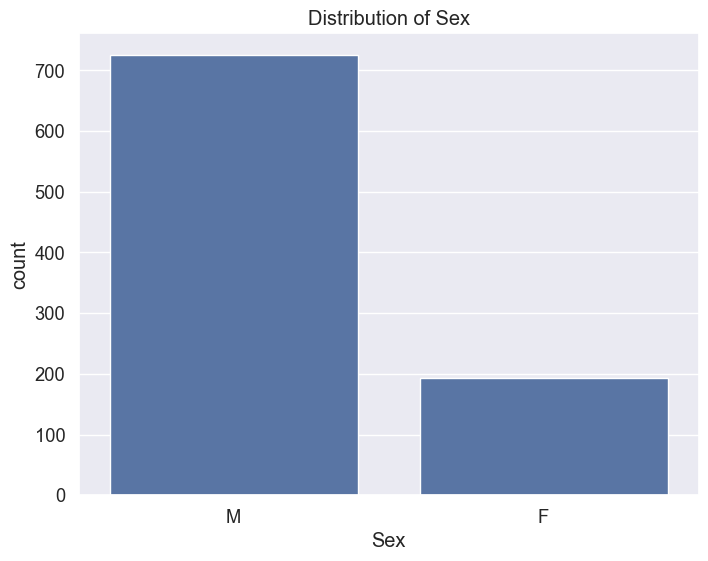

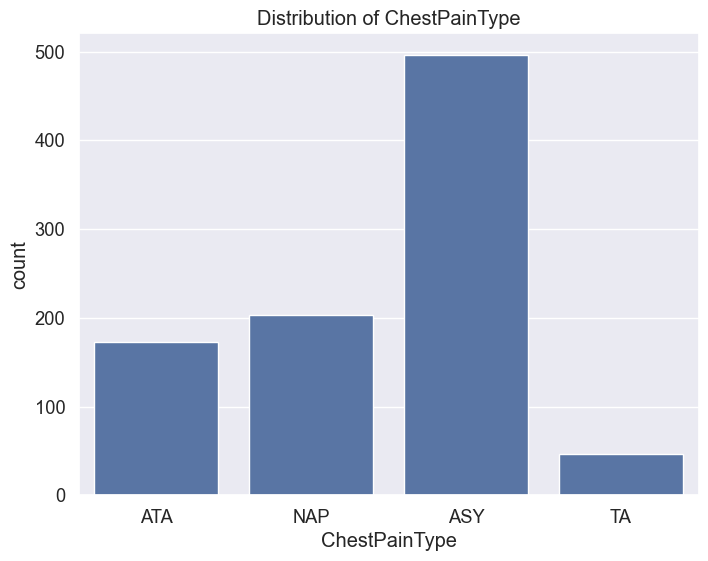

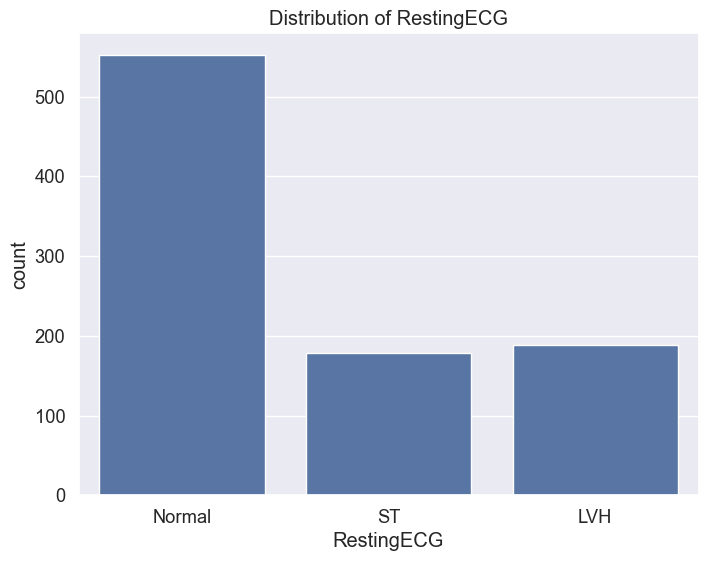

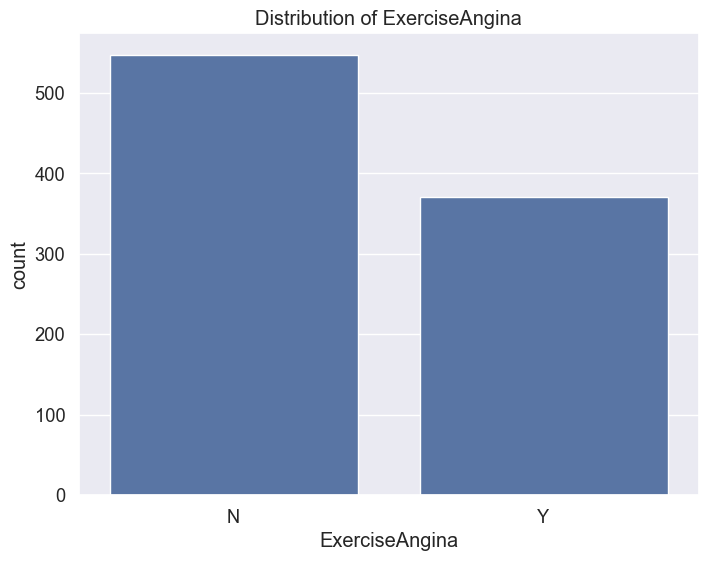

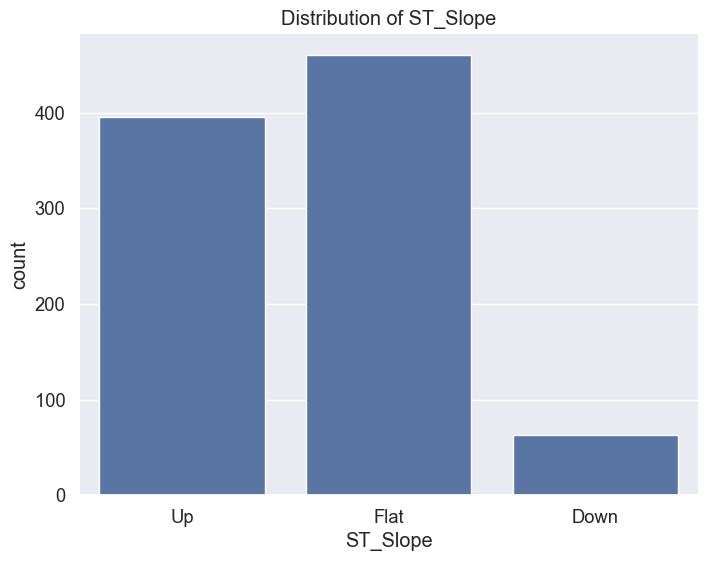

In [67]:
# categorical features distribution

for c in categorical:
    plt.figure(figsize=(8,6))
    sns.countplot(x=df[c])
    plt.title(f'Distribution of {c}')
    plt.show()

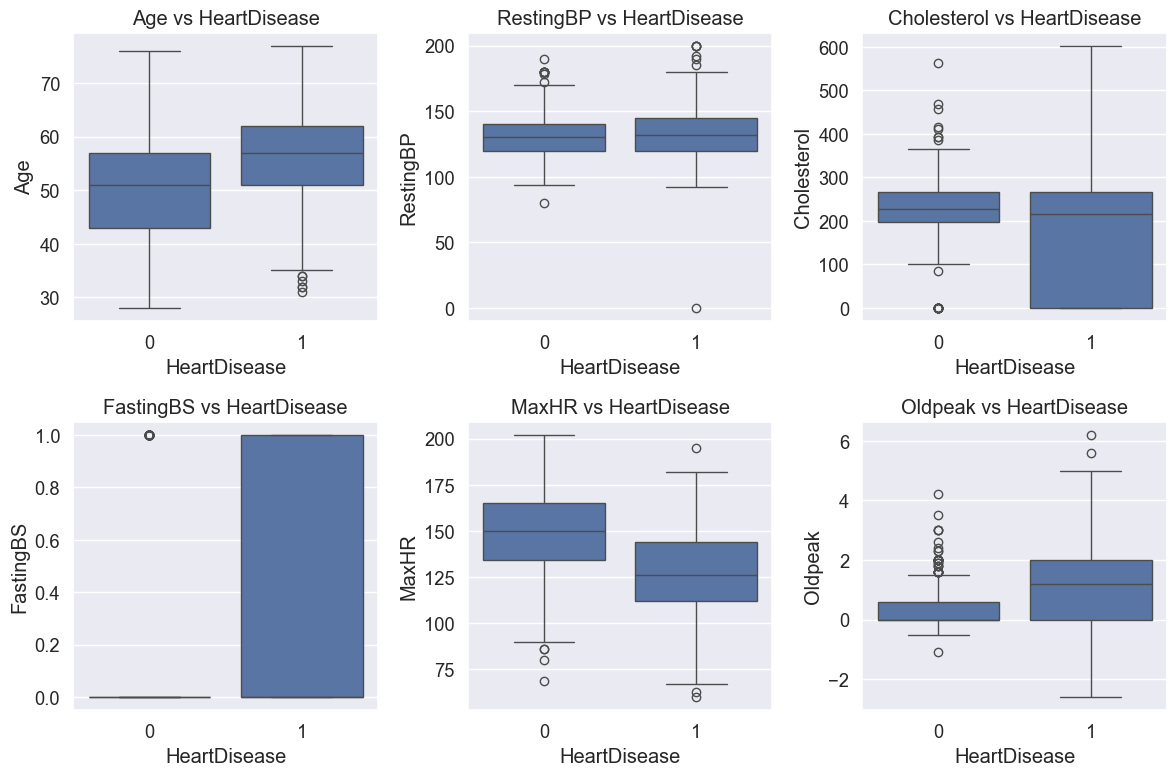

In [68]:
# Relationship between features and target variable
plt.figure(figsize=(12,8))
for i , col in enumerate(numeric,1):
    plt.subplot(2,3,i)
    sns.boxplot(x='HeartDisease', y=col, data=df)
    plt.title(f'{col} vs HeartDisease')
    
plt.tight_layout()
plt.show()    
